In [ ]:
# Check the GPU
!nvidia-smi

In [ ]:
# Install dependencies.
!pip install bitsandbytes transformers accelerate -q
!pip install git+https://github.com/huggingface/diffusers.git -q
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
# Mount Google drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

In [ ]:
# Set the details for your model here:
my_prompt_trigger = "wny man"
hf_username = "TimothyAlexisVass"
hf_modelname = "my-model-name"
checkpoint = "sdxl-dreambooth-lora-000016.safetensors"

import torch

from diffusers import DiffusionPipeline, AutoencoderKL

vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
base = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0",
    vae=vae,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True,
)
base.load_lora_weights(f"{hf_username}/{hf_modelname}", weight_name=checkpoint)

_ = base.to("cuda")

  0%|          | 0/40 [00:00<?, ?it/s]

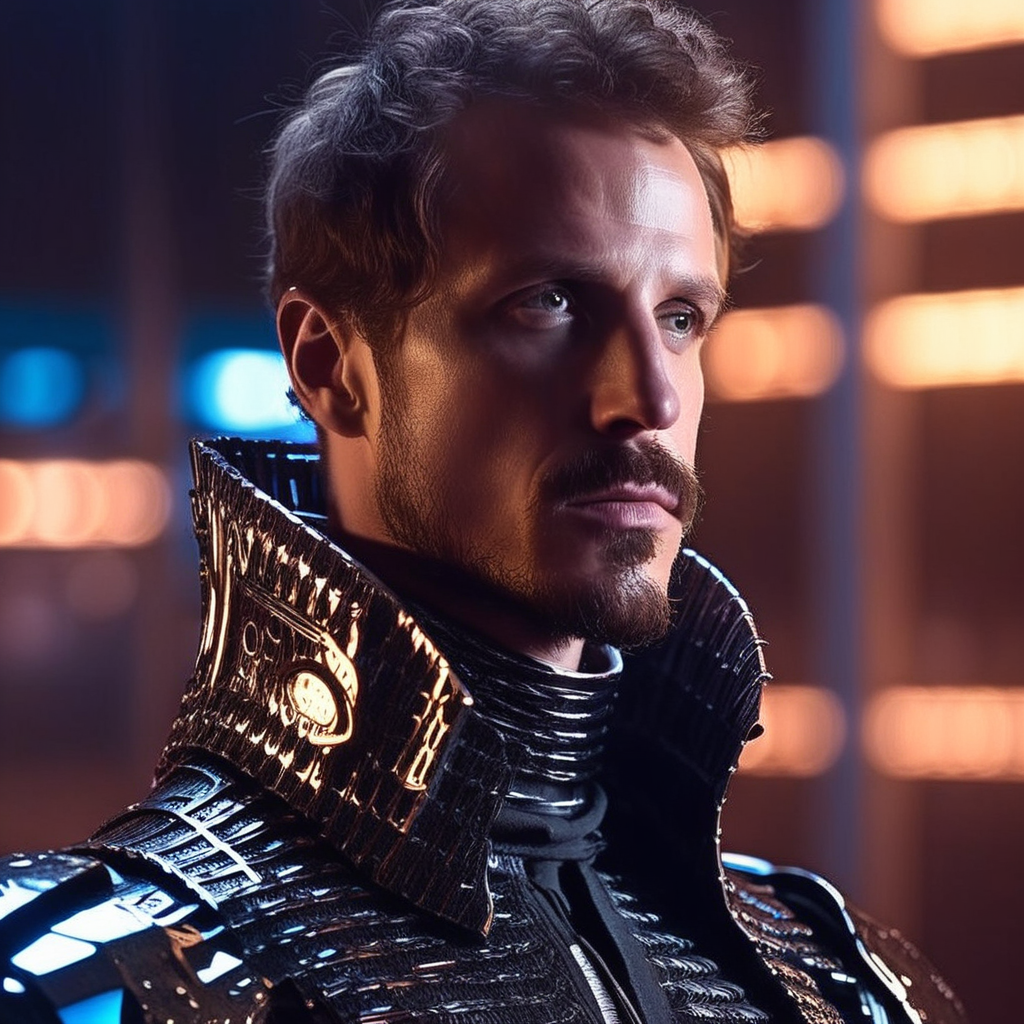

In [ ]:
import os
import zipfile
import random

prompt = f"Blazing colorportrait of {my_prompt_trigger} as cyberpunk cyborg in black polished metal armor looking determined, futuristic duotone background"
quality = "intricate details even to the smallest particle, extreme detail of the enviroment, sharp portrait, well lit, interesting outfit, beautiful shadows, bright, photoquality, ultra realistic, masterpiece, 8k"
negative_prompt = "ugly, old, boring, photoshopped, tired, wrinkles, scar, gray hair, big forehead, crosseyed, dumb, stupid, cockeyed, disfigured, blurry, assymetrical, unrealistic, grayscale, black and white, bald, high hairline, balding, receeding hairline, grayscale, bad anatomy, unnatural irises, no pupils, blurry eyes, dark eyes, extra limbs, deformed, disfigured eyes, out of frame, no irises, assymetrical face, broken fingers, extra fingers, disfigured hands"
num_samples = 1
guidance_scale = 8
num_inference_steps = 30
height = 1024
width = 1024
seed = random.randint(1, 99999)

# Set this to the folder you want to save the image to in Google Drive
output_dir = "drive/MyDrive/manually_generated"
os.makedirs(output_dir, exist_ok=True)

images = base(
    prompt + ". " + quality,
    height=height,
    width=width,
    negative_prompt=negative_prompt,
    num_images_per_prompt=num_samples,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    generator=torch.manual_seed(seed)
).images

for image in images:
    display(image)
    img_path = os.path.join(output_dir, f"{prompt}_{seed}.png")
    image.save(img_path)

In [ ]:
import os
import random
import zipfile

quality = "absolute detail of even the smallest particles, smile, kindness, interesting outfit, beautiful hands, full head of hair, beautiful shadows, masterpiece, intricate detail of the environment, natural lighting, HDR, 8k"
negative_prompt = "ugly, old, boring, photoshopped, tired, wrinkles, scar, gray hair, big forehead, crosseyed, dumb, stupid, cockeyed, disfigured, blurry, assymetrical, unrealistic, grayscale, bad anatomy, unnatural irises, no pupils, blurry eyes, dark eyes, extra limbs, deformed, disfigured eyes, out of frame, no irises, assymetrical face, broken fingers, extra fingers, disfigured hands"
guidance_scale = 8
num_inference_steps = 30
height = 1024
width = 1024

looks = ["confident and wealthy", "heroic in high-tech armor", "fantastically luxurious", "peaceful and smiling", "sharp with jewellery", "gritty and realistic", "colorful and vibrant"]
styles = ["colorful sci-fi", "vibrant fantasy", "detailed steampunk", "glorious cyberpunk", "retro futuristic"]
artists = ["alejandro burdisio", "alena aenami", "alex alemany", "alex andreev"]

# Set this to the folder you want to save the image to in Google Drive
output_dir = "drive/MyDrive/generated_images2"
os.makedirs(output_dir, exist_ok=True)

for look in looks:
    for style in styles:
        for artist in artists:
            seed = random.randint(1, 99999)
            prompt = f"Portrait of {my_prompt_trigger}"
            prompt += f" looking {look}"
            prompt += f", by {artist}"
            prompt += f" in {style} style"

            print("Generating", prompt)
            image = base(
                prompt + ". " + quality,
                height=height,
                width=width,
                generator=torch.manual_seed(seed),
                negative_prompt=negative_prompt,
                num_images_per_prompt=1,
                num_inference_steps=num_inference_steps,
                guidance_scale=guidance_scale,
            ).images[0]

            display(image)
            img_path = os.path.join(output_dir, f"{prompt}_{seed}.png")
            image.save(img_path)

In [ ]:
import os
import zipfile

quality = "absolute detail of even the smallest particles, smile, kindness, interesting outfit, beautiful hands, full head of hair, beautiful shadows, masterpiece, intricate detail of the environment, natural lighting, HDR, 8k"
negative_prompt = "ugly, old, boring, photoshopped, tired, wrinkles, scar, gray hair, big forehead, crosseyed, dumb, stupid, cockeyed, disfigured, blurry, assymetrical, unrealistic, grayscale, bad anatomy, unnatural irises, no pupils, blurry eyes, dark eyes, extra limbs, deformed, disfigured eyes, out of frame, no irises, assymetrical face, broken fingers, extra fingers, disfigured hands"
num_images_per_prompt = 1
guidance_scale = 8
num_inference_steps = 30
height = 1024
width = 1024

ideas = [
    "Sci-Fi Space Captain In a futuristic spaceship command center, wearing a captain's uniform, surrounded by high-tech control panels, exploring the cosmos",
    "Mythical Water Nymph Submerged in a serene underwater world, adorned with aquatic-themed attire, surrounded by colorful sea creatures and coral reefs",
    "Cyberpunk Hacker Sitting in a dimly lit room with holographic screens, wearing hacker gear, typing furiously while neon lights and futuristic cityscape glow outside",
    "Nature Shaman Embracing the power of nature, draped in natural materials, holding a staff, surrounded by mystical forest and wildlife",
    "Renaissance Alchemist Surrounded by ancient manuscripts and alchemical equipment, dressed in Renaissance-era clothing, capturing the intrigue of alchemy",
    "Celestial Explorer Floating among the stars in a cosmic spaceship, donning a futuristic spacesuit, exploring unknown galaxies",
    "Mythical Steampunk Inventor In a fantastical steampunk workshop, covered in gears and gadgets, wearing a steampunk outfit, crafting marvelous inventions",
    "Fantasy Potion Master Standing in a mystical potion lab, concocting magical brews, surrounded by bubbling cauldrons and glowing vials",
    "Futuristic Gladiator In a high-tech arena, wearing futuristic gladiator armor, armed with energy weapons, ready for an epic battle",
    "Victorian Ghost Hunter Holding a lantern and antique weapons, investigating a haunted mansion, capturing the mystery of the supernatural",
    "Tropical Island Explorer On a sandy beach with vibrant beachwear, surrounded by palm trees and crystal-clear waters, exploring paradise",
    "Time-Traveling Archaeologist Unearthing ancient artifacts in different historical eras, wearing period-specific clothing and using advanced time-travel technology",
    "Zen Garden Meditator Sitting in a tranquil Japanese Zen garden, practicing mindfulness and meditation, with serene surroundings",
    "Fantasy Beast Tamer Surrounded by mythical creatures like dragons and griffins, dressed in fantastical tamer attire, showcasing a unique connection with beasts",
    "Space Pirate Captain Aboard a futuristic pirate ship in outer space, wearing space pirate attire, leading a crew of interstellar swashbucklers",
    "Magical Librarian In a vast mystical library filled with enchanted books and scrolls, wearing wizardly robes, wielding knowledge as a powerful tool",
    "Candyland Ruler In a whimsical candy kingdom, dressed in sugary attire, overseeing a land of sweets and confections",
    "Desert Nomad Roaming the vast desert sands, draped in desert clothing, with a camel and a backdrop of endless dunes",
    "Futuristic Pop Star Performing on a holographic stage, wearing a dazzling pop star outfit, surrounded by futuristic fans and neon lights",
    "Fairytale Woodsman In a mystical forest with towering trees and magical creatures, wearing rugged woodsman attire, showcasing a connection with nature",
    "Crystal Cavern Explorer Deep within a sparkling crystal cave, dressed in explorer gear, surrounded by shimmering crystals and underground wonders",
    "Sci-Fi Bounty Hunter In a gritty futuristic city, wearing a bounty hunter's armor, armed with high-tech weaponry, on the hunt for futuristic criminals",
    "Samurai Archer In ancient Japan, dressed as a samurai archer, drawing a traditional bow with precision, embodying the art of archery",
    "Forest Druid In a mystical forest grove, wearing druidic robes, communing with the spirits of the woods and practicing earth magic",
    "Magical Circus Ringmaster In a whimsical circus tent, wearing a ringmaster's outfit, leading a troupe of magical circus performers",
    "Futuristic Explorer of Mars In a spacesuit on the red planet, surrounded by Martian landscapes, exploring the mysteries of Mars",
    "Tropical Rainforest Scientist In a lush rainforest, dressed as a biologist, studying exotic flora and fauna, and contributing to conservation efforts",
    "Fantasy Castle Defender On the ramparts of a majestic castle, wearing knight's armor, protecting the realm from mythical threats",
    "High-Fashion Model In a glamorous fashion studio, wearing haute couture outfits, posing for a high-fashion photoshoot",
    "Magical Circus Acrobat Performing daring aerial feats under a colorful big top, dressed as a circus acrobat, showcasing grace and agility",
    "Viking Explorer On a longship, dressed as a Viking warrior, navigating treacherous waters, ready for epic adventures",
    "Jungle Adventurer In the heart of a dense jungle, wearing explorer gear, uncovering hidden mysteries and ancient ruins",
    "Fantasy Sorcerer In a mystical tower filled with arcane symbols, dressed in sorcerer's robes, casting powerful spells",
    "Lunar Astronaut On the moon's surface, wearing a lunar astronaut suit, exploring the lunar landscape and conducting scientific experiments",
    "Futuristic Martial Artist In a cyber-enhanced dojo, wearing high-tech martial arts attire, showcasing martial arts mastery in a futuristic setting",
    "Steampunk Aviator In a steampunk airship cockpit, wearing aviator gear, piloting a fantastical flying machine through the skies",
    "Subterranean Explorer Deep underground in a cavern filled with glowing mushrooms and subterranean wonders, dressed as an intrepid explorer",
    "Time-Traveling Inventor Surrounded by a time machine and curious inventions, wearing a mix of historical and futuristic attire, experimenting with time",
    "Cosmic Voyager Drifting through the cosmos in a mystical spaceship, wearing celestial-themed attire, exploring the wonders of the universe",
    "Jungle Tribal Leader In a lush tribal village deep in the jungle, dressed in tribal attire, leading a community with wisdom and strength",
    "Paladin, wearing brilliant white armor and a crown, fantasy concept art, Artstation trending, beautiful landscape in the background, golden hour lighting",
    "Hobbit, small, big brown eyes, green and brown clothing, detailed facial features, wispy hair, fantasy concept art, highly detailed, earthy colors",
    "Harry Potter character, magical world, wands, robes, Hogwarts castle in the background, enchanted forest, detailed lighting, digital painting, concept art",
    "Elf with long blonde hair, looking at the camera, fantasy concept art, intricate details, detailed armor, majestic background, digital painting, smooth lighting",
    "Jedi holding a lightsaber, highly detailed, science fiction, Star Wars concept art, intricate details, bright colors, golden hour, cinematic scene",
    "Greek Mythological God, towering on Mount Olympus, divine aura, elegant robes, ancient architecture in the background, ethereal lighting",
    "Cyberpunk Hero, futuristic cityscape, cyber enhancements, neon lights, trench coat, wielding advanced weaponry, dystopian atmosphere, cyberpunk concept art",
    "Steampunk Explorer, Victorian-era attire, intricate goggles and gadgets, steam-powered machinery, airship in the sky, brass and leather aesthetics, steampunk concept art",
    "Space Explorer, astronaut suit, floating in outer space, Earth or distant planets in the backdrop, cosmic lighting, high-tech equipment, futuristic concept art",
    "Time Traveler, standing amidst swirling time vortex, period-specific clothing from different eras, time machines, time manipulation effects, time travel concept art",
    "Mythical Creature, such as a dragon rider, mermaid, centaur, or phoenix, in a mythical realm with magical landscapes and creatures, fantasy concept art",
    "Samurai Warrior, traditional samurai armor, katana in hand, cherry blossoms in the background, honorable and stoic expression, Japanese cultural elements, samurai concept art",
    "Superhero, wearing a unique superhero costume, striking a dynamic pose, city skyline at night, superpowers on display, comic book-style art, superhero concept art",
    "with black armored uniform, futuristic, giant robot, inspired by Krenz Cushart, neoism, Kawacy, WLOP, Ghost in the Shell anime",
    "Futuristic Cyberpunk Samurai Dressed in a sleek, black armored uniform inspired by cyberpunk aesthetics, wielding a high-tech katana, with a giant robot looming in the background",
    "Bohemian Dreamer Wrapped in fantastic hand-dyed cotton clothes adorned with beaded feather decorative fringe knots, set against a backdrop of colorful subtropical flowers and plants",
    "in Cyberpunk Power Armor Seated on the gritty cyberpunk streets, wearing a sleek suit of power armor, this closeup character portrait is inspired by the artistry of Krenz Cushart, Artgerm, and Lois van Baarle",
    "Celestial Divinity Bathed in ethereal light and dressed in celestial attire, this portrait showcases a divine and otherworldly presence The background features cosmic elements and starry skies",
    "Floral Goddess Surrounded by a lush, magical garden filled with vibrant and exotic flowers, Alariansharp man embodies the essence of a floral god",
    "Time Traveler's Explorer Wearing a steampunk-inspired explorer's outfit, complete with goggles and intricate accessories, Alariansharp man is depicted in a clockwork-filled laboratory ",
    "sitting on the ground, cyberpunk art, by Krenz Cushart, wearing a suit of power armor, closeup character portrait, cute detailed digital art, Artgerm and Lois van Baarle, Japanese anime",
    "Astral Voyager Draped in flowing cosmic robes, standing on the precipice of a celestial realm, surrounded by swirling galaxies and nebulae, the character embodies the wonder of exploring the universe",
    "Steam-powered Inventor In a steampunk workshop, wearing goggles and a leather apron, surrounded by intricate gears and steam-powered contraptions, showcasing the ingenuity of an inventor",
    "Jungle Explorer Deep within a lush tropical rainforest, dressed in rugged explorer attire, with exotic creatures and vibrant foliage in the backdrop, conveying a sense of adventure and discovery",
    "Timeless Romantic In a candlelit Victorian-era drawing room, dressed in elegant attire, with a vintage book of poetry in hand, capturing the essence of timeless romance and nostalgia",
    "Guardian of the Elements Positioned within a mystical elemental sanctuary, surrounded by elemental forces like fire, water, earth, and air, symbolizing a connection with the natural world",
    "High-Tech Cyberspace Hacker In a futuristic digital realm, donned in high-tech cyber attire with holographic screens and neon lights, portraying a masterful hacker in the digital frontier",
    "Renaissance Alchemist Surrounded by bubbling flasks, ancient scrolls, and alchemical symbols, dressed in Renaissance alchemist attire, embodying the pursuit of knowledge and transformation",
    "Space Captain Commanding a spaceship's bridge, adorned in futuristic captain's uniform, with a starry expanse beyond, exemplifying leadership and exploration in the vastness of space",
    "Cosmic Shaman Deep in cosmic meditation, dressed in mystical attire, with celestial patterns and symbols, communing with the universe and channeling cosmic energies",
    "Serene Waterbender Amidst serene waterscapes, dressed in flowing waterbender robes, manipulating water with grace and fluidity, representing harmony with the element of water",
    "Art Nouveau Muse In a dreamy Art Nouveau garden, adorned with floral motifs and flowing curves, embodying the artistic inspiration and elegance of the Belle Époque era",
    "Cyberpunk Rockstar Center stage in a cyberpunk nightclub, clad in futuristic rocker attire, bathed in neon lights and digital effects, exuding the energy and charisma of a cyberpunk rockstar",
    "Mythical Beast Tamer Surrounded by mythical creatures like griffins, unicorns, and phoenixes, dressed in enigmatic tamer attire, showcasing a deep connection with the world of legends",
    "Renaissance Court Jester In a Renaissance palace, wearing colorful and whimsical jester attire, with jesting props and a playful demeanor, capturing the spirit of merriment and entertainment",
    "Neo-Victorian Explorer In a neo-Victorian steampunk world, wearing a mix of Victorian and futuristic attire, exploring mysterious clockwork and steam-powered landscapes, symbolizing a fusion of past and future",
    "Samurai of Light Bathed in ethereal light, wearing radiant samurai armor with intricate luminescent details, exemplifying the virtues of honor and valor in a mystical world of light and shadow",
    "Enchanted Forest Guardian In a magical forest glade, dressed in nature-themed attire, surrounded by mystical creatures and enchanted flora, embodying the role of a guardian of the woods",
    "Quantum Physicist In a cutting-edge laboratory, wearing a lab coat and surrounded by advanced scientific equipment, symbolizing the pursuit of understanding the mysteries of quantum physics and the universe",
    "Mystic Seafarer On the deck of a mystical sailing ship, wearing sailor attire infused with arcane symbols, navigating through seas of both physical and metaphysical challenges",
    "Mythical Artifact Archaeologist In an ancient archaeological site, dressed in explorer gear, surrounded by mythical artifacts and ruins from forgotten civilizations, unearthing the secrets of the past",
    "Whimsical Wonderland Traveler In a surreal wonderland landscape inspired by Lewis Carroll's Alice in Wonderland, wearing whimsical attire, encountering curious characters, and embracing the whimsy of the unknown",
    "Renaissance Painter's Muse In the studio of a Renaissance painter, draped in sumptuous fabrics and bathed in soft studio lighting, serving as the muse for a masterpiece in progress",
    "Celestial Nomad Drifting through the cosmos in a celestial caravan, wearing celestial traveler attire, surrounded by cosmic wonders, symbolizing a journey through the universe's mysteries",
    "Guardian of Dreams Within a surreal dreamscape, dressed in ethereal attire, standing amidst floating dream fragments, embodying the role of a protector of dreams and imagination",
    "Elemental Mage In an elemental sanctum, dressed in robes representing earth, fire, water, and air, wielding elemental magic with grace and mastery",
    "Steampunk Time Traveler In a steampunk time machine, dressed in time-traveler gear, surrounded by clockwork mechanisms, embarking on journeys through the past and future",
    "Fantasy Librarian In a grand fantasy library with towering shelves of ancient tomes, wearing scholarly robes, embodying a deep reverence for knowledge and literature",
    "Interdimensional Explorer Standing at the intersection of multiple dimensions, clad in cosmic attire, with overlapping realms and realities converging around, symbolizing an exploration of the multiverse",
    "Ancient Guardian of Knowledge In a hidden chamber of ancient wisdom, adorned in ancient robes, surrounded by scrolls and artifacts, preserving and protecting ancient knowledge",
    "Futuristic Music Maestro On a futuristic stage, wearing avant-garde musician attire, manipulating holographic instruments and creating music that transcends time and space",
    "Guardian of Endangered Species In a lush rainforest, dressed in conservationist attire, surrounded by endangered animals, symbolizing a commitment to protecting the world's wildlife",
    "Fantasy Knight of the Skies Riding a majestic dragon through a sky filled with floating islands and ethereal clouds, donned in aerial knight armor, embodying the chivalry and wonder of a fantastical realm",
    "Ancient Mayan Archaeologist In the heart of a Mayan temple complex, wearing expedition gear, deciphering ancient hieroglyphics and exploring the mysteries of an ancient civilization",
    "Fairy Tale Explorer In a whimsical forest straight out of a fairy tale, dressed in storybook attire, embarking on adventures inspired by classic folklore and legends",
    "Futuristic Fashion Icon In a high-tech fashion studio, clad in avant-garde futuristic fashion, showcasing innovative styles and pushing the boundaries of fashion in a cybernetic world",
    "Mythical Bard Playing a magical harp in a mystical forest glen, dressed in bardic attire, surrounded by enchanted creatures, spinning tales and melodies that weave magic into reality",
    "Spiritual Guardian of the Redwoods Standing amidst ancient giant redwood trees, dressed in reverence for nature, symbolizing the protection and conservation of these majestic forests",
    "Neo-Retro Space Explorer In a fusion of retro and futuristic elements, donned in a spacesuit reminiscent of classic sci-fi, exploring a colorful and retro-futuristic cosmos",
    "Cosmic Dance Visionary In a surreal cosmic dance club, wearing visionary attire, surrounded by dynamic light displays and trance-inducing music, expressing the artistry of cosmic dance",
    "Quantum Artisan In a workshop of quantum artistry, dressed in attire merging art and science, creating intricate and mind-bending artworks that blur the line between reality and abstraction",
    "Celestial Explorer Drifting through a celestial wonderland, dressed in iridescent cosmic attire, surrounded by breathtaking celestial phenomena, exploring the mysteries of the cosmos",
    "Timeless Wanderer In a surreal, timeless landscape, wearing attire that transcends eras, with surreal elements like floating clocks and shifting dimensions, symbolizing the eternal journey of existence",
    "Elemental Maestro In a grand elemental arena, dressed in robes of fire, water, earth, and air, orchestrating a symphony of elemental forces in an awe-inspiring display of mastery",
    "Oceanic Visionary Submerged in the depths of the ocean, wearing bioluminescent attire, surrounded by mesmerizing marine life and ethereal underwater landscapes, embodying the magic of the sea",
    "Dreamweaver Within a dreamscape of swirling colors and abstract forms, dressed in surreal attire, manipulating the very fabric of dreams and creating astonishing dreamscapes",
    "Techno-Sorcerer In a cyber-magical realm, adorned in techno-arcane robes, wielding holographic spells and conjuring digital marvels, blurring the lines between magic and technology",
    "Steampunk Inventor of Dreams In a whimsical steampunk dreamscape, wearing eccentric inventor attire, surrounded by fantastical steam-powered contraptions that bring dreams to life",
    "Quantum Voyager In a mind-bending quantum realm, dressed in attire that shifts and distorts, exploring the quantum mysteries and realities that challenge the limits of perception",
    "Enchanted Symphony Conductor Leading an orchestra of enchanted instruments in a mystical forest glade, dressed in ethereal conductor attire, harmonizing with the enchanting melodies of nature",
    "Cosmic Sculptor In a cosmic art studio, dressed in attire made of stardust, sculpting celestial wonders and crafting galaxies with the touch of a hand, blurring the boundaries between art and the universe",
    "Time-Traveling Historian Amidst swirling temporal rifts, dressed in time-traveler attire, holding ancient artifacts from the past and future, preserving the threads of history across ages",
    "Astral Philosopher Meditating amidst astral realms, draped in celestial wisdom, surrounded by cosmic symbols and constellations, embodying the pursuit of profound cosmic truths",
    "Nature's Alchemist In a mystical forest laboratory, wearing attire woven from leaves and vines, performing alchemical wonders that bring harmony to the natural world",
    "Interstellar Composer In the heart of a cosmic symphony, dressed in celestial conductor attire, orchestrating symphonies that resonate across the cosmos, creating harmonious cosmic music",
    "Techno-Magical Artisan In a workshop where magic and technology converge, wearing attire adorned with techno-magical runes, crafting enchanted devices that defy imagination",
    "Gravity Manipulator Suspended in a gravity-defying realm, dressed in attire that defies physics, manipulating gravity with a wave of the hand, defying the laws of nature",
    "Aerial Acrobat of Dreams Soaring through a dreamscape on colorful wings, wearing attire that shimmers with dream-like qualities, performing breathtaking aerial feats amidst surreal skies",
    "Mythical Aurora Guardian Standing beneath the dancing auroras in a mystical polar realm, dressed in attire of shimmering light, protecting the ethereal beauty of the northern lights",
    "Chrono-Painter In a studio beyond time, dressed in attire that shifts through ages, painting breathtaking artworks that capture the essence of past, present, and future simultaneously",
    "Quantum Musician Playing an instrument that resonates with the vibrations of alternate dimensions, dressed in attire that phases in and out of reality, creating music that transcends time and space",
    "Celestial Architect Building cosmic structures among the stars, dressed in attire woven from cosmic dust, crafting breathtaking celestial edifices that bridge the realms of dreams and reality",
    "Timeless Dancer In a timeless dance hall, dressed in attire that blends centuries, moving through dance forms that evoke the spirit of ages past and ages yet to come",
    "Techno-Futurist Explorer In a futuristic cityscape of neon and holograms, wearing cutting-edge explorer attire, venturing into the technologically advanced wonders of tomorrow",
    "Nature's Symphony Conductor Leading a symphony of the natural world, dressed in attire woven from elements of earth, air, fire, and water, harmonizing with the cacophony of nature's beauty",
    "Multiverse Cartographer Charting the uncharted territories of the multiverse, dressed in attire that morphs between dimensions, unveiling the breathtaking diversity of parallel realities",
    "Neo-Retro Time Traveler Journeying through time in a fusion of retro and futuristic attire, exploring moments in history with a blend of classic charm and high-tech gadgets",
    "Techno-Mystic Sculptor Sculpting holographic wonders in a realm where technology meets mysticism, dressed in attire that merges ancient symbols and futuristic aesthetics",
    "Quantum Dreamweaver Weaving dreams and realities in a quantum dreamscape, dressed in attire that constantly transforms, crafting breathtaking dreamscapes that challenge the boundaries of existence",
    "Ethereal Time Keeper In a realm of floating hourglasses, dressed in attire that captures the essence of time itself, guarding the flow of time and its infinite wonders",
    "Cosmic Biologist Exploring exotic extraterrestrial ecosystems, dressed in attire that adapts to alien environments, discovering the breathtaking biodiversity of distant planets and celestial realms",
    "Metaphysical Artist Creating artworks that transcend the material world, dressed in attire that merges with the ethereal, channeling the awe-inspiring beauty of the metaphysical into tangible forms",
    "Elemental Symphony Composer Composing symphonies that harness the power of the elements, dressed in attire representing fire, water, earth, and air, creating breathtaking elemental harmonies",
    "Techno-Druid In a cybernetic forest, dressed in attire that fuses nature and technology, communing with digital flora and fauna, embodying the balance between the natural and digital realms",
    "Subterranean Explorer of Wonders Venturing into the depths of a subterranean wonderland, dressed in attire adapted to underground life, discovering breathtaking caverns and hidden realms beneath the Earth's surface",
    "Infinity Weaver In a realm of infinite possibilities, dressed in attire that reflects endless potential, weaving the fabric of reality with creativity and imagination, unveiling the breathtaking tapestry of existence",
    "Quantum Architect of Realities Building extraordinary realms within the quantum fabric, dressed in attire that shimmers with quantum possibilities, creating breathtaking quantum landscapes where the impossible becomes reality"
]

# Set this to the folder you want to save the image to in Google Drive
output_dir = "drive/MyDrive/generated_images2"
os.makedirs(output_dir, exist_ok=True)

for i in range(100):
  for idea in ideas:
      prompt = f"Painted portrait of fit and healhy {my_prompt_trigger} with beautiful hair and face in awesome outfit as "
      prompt += idea
      seed = random.randint(1, 99999)

      print("Generating", prompt)
      image = base(
          prompt + ". " + quality,
          height=height,
          width=width,
          generator=torch.manual_seed(seed),
          negative_prompt=negative_prompt,
          num_images_per_prompt=num_images_per_prompt,
          num_inference_steps=num_inference_steps,
          guidance_scale=guidance_scale,
      ).images[0]

      img_path = os.path.join(output_dir, f"{idea}_{seed}.png")
      image.save(img_path)